In [1]:
print('ok!')

ok!


# 주가 LSTM - USD

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense, Activation
# from keras.callbacks import TensorBoard, ModelCheckpoint, ReduceLROnPlateau
import datetime

st_data = pd.read_csv('셀트리온_data.csv', index_col=[0])
st_data.drop(['keyword'], axis='columns', inplace=True)
st_data.head()

,date,close,open,high,low,volume
0,2015-11-17,86100.0,83400.0,86100.0,82300.0,1597995.0
1,2015-11-18,89200.0,86300.0,90000.0,85200.0,2566865.0
2,2015-11-19,90700.0,91200.0,93700.0,89600.0,2487729.0
3,2015-11-20,91400.0,90500.0,92000.0,89700.0,1044090.0
4,2015-11-23,90700.0,91900.0,92400.0,88800.0,1326119.0


In [3]:
ex_data = pd.read_csv('exchange_index.csv', index_col=[0])
ex_data.drop(['date', 'jpy', 'eur', 'cny'], axis='columns', inplace=True)
df = pd.concat([st_data, ex_data], axis=1)
ex_data.head()
df.head()

,date,close,open,high,low,volume,usd
0,2015-11-17,86100.0,83400.0,86100.0,82300.0,1597995.0,"1,172.50"
1,2015-11-18,89200.0,86300.0,90000.0,85200.0,2566865.0,"1,171.00"
2,2015-11-19,90700.0,91200.0,93700.0,89600.0,2487729.0,"1,164.00"
3,2015-11-20,91400.0,90500.0,92000.0,89700.0,1044090.0,"1,156.50"
4,2015-11-23,90700.0,91900.0,92400.0,88800.0,1326119.0,"1,159.50"


In [4]:
high_price = df['high'].values
low_price = df['low'].values
mid_price = (high_price + low_price) /2

# 최근 50일 데이터를 다음을 예측
# 50개를 보고 예측하기 때문에 51개씩 저장
seq_len = 50
sequence_length = seq_len + 1

result = []
for index in range(len(mid_price) - sequence_length):
    result.append(mid_price[index: index + sequence_length])
    
try:
    normalized_data = []
    for window in result:
        normalized_window = [((float(p) / float(window[1])) - 1) for p in window]
        normalized_data.append(normalized_window)
except:
    print('예외 발생!')

result = np.array(normalized_data)

# split train and test data
row = int(round(result.shape[0] * 0.9))
train = result[:row, :]
np.random.shuffle(train)

x_train = train[:, :-1]
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = train[:, -1]

x_test = result[row:, :-1]
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
y_test = result[row:, -1]

x_train.shape, x_test.shape

((1064, 50, 1), (118, 50, 1))

In [5]:
model = Sequential()

model.add(LSTM(50, return_sequences=True, input_shape=(50, 1)))

model.add(LSTM(64, return_sequences=False))

model.add(Dense(1, activation='linear'))

model.compile(loss='mse', optimizer='rmsprop')
# model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 50, 50)            10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                29440     
_________________________________________________________________
dense (Dense)                (None, 1)                 65        
Total params: 39,905
Trainable params: 39,905
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=10, epochs=100)
# print('정확도 : %.4f' % (model.evaluate(x_train, y_train)[1]))

Epoch 1/100
107/107 [==============================] - 2s 22ms/step - loss: 0.0059 - val_loss: nan
Epoch 2/100
107/107 [==============================] - 2s 16ms/step - loss: 0.0035 - val_loss: nan
Epoch 3/100
107/107 [==============================] - 2s 16ms/step - loss: 0.0025 - val_loss: nan
Epoch 4/100
107/107 [==============================] - 2s 16ms/step - loss: 0.0019 - val_loss: nan
Epoch 5/100
107/107 [==============================] - 2s 16ms/step - loss: 0.0016 - val_loss: nan
Epoch 6/100
107/107 [==============================] - 2s 17ms/step - loss: 0.0014 - val_loss: nan
Epoch 7/100
107/107 [==============================] - 2s 17ms/step - loss: 0.0012 - val_loss: nan
Epoch 8/100
107/107 [==============================] - 2s 17ms/step - loss: 0.0012 - val_loss: nan
Epoch 9/100
107/107 [==============================] - 2s 17ms/step - loss: 0.0012 - val_loss: nan
Epoch 10/100
107/107 [==============================] - 2s 17ms/step - loss: 0.0011 - val_loss: nan
Epoch 11/

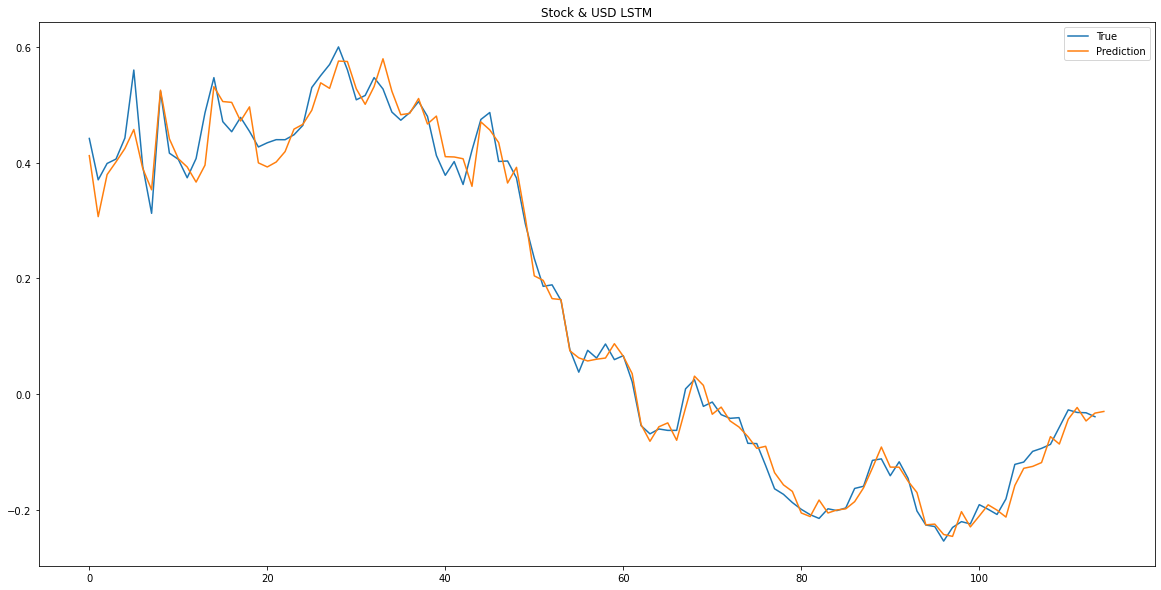

In [13]:
pred = model.predict(x_test)

fig = plt.figure(facecolor='white', figsize=(20, 10))
ax = fig.add_subplot(111)
ax.plot(y_test, label='True')
ax.plot(pred, label='Prediction')
plt.title('Stock & USD LSTM')
ax.legend()
plt.show()

# 주가 LSTM - JPY

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense, Activation
# from keras.callbacks import TensorBoard, ModelCheckpoint, ReduceLROnPlateau
import datetime

st_data = pd.read_csv('셀트리온_data.csv', index_col=[0])
st_data.drop(['keyword'], axis='columns', inplace=True)
st_data.head()

ex_data = pd.read_csv('exchange_index.csv', index_col=[0])
ex_data.drop(['date', 'usd', 'eur', 'cny'], axis='columns', inplace=True)
df = pd.concat([st_data, ex_data], axis=1)
# ex_data.head()
# df.head()

high_price = df['high'].values
low_price = df['low'].values
mid_price = (high_price + low_price) /2

# 최근 50일 데이터를 다음을 예측
# 50개를 보고 예측하기 때문에 51개씩 저장
seq_len = 50
sequence_length = seq_len + 1

result = []
for index in range(len(mid_price) - sequence_length):
    result.append(mid_price[index: index + sequence_length])
    
try:
    normalized_data = []
    for window in result:
        normalized_window = [((float(p) / float(window[1])) - 1) for p in window]
        normalized_data.append(normalized_window)
except:
    print('예외 발생!')

result = np.array(normalized_data)

# split train and test data
row = int(round(result.shape[0] * 0.9))
train = result[:row, :]
np.random.shuffle(train)

x_train = train[:, :-1]
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = train[:, -1]

x_test = result[row:, :-1]
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
y_test = result[row:, -1]

x_train.shape, x_test.shape

((1064, 50, 1), (118, 50, 1))

In [15]:
model = Sequential()

model.add(LSTM(50, return_sequences=True, input_shape=(50, 1)))

model.add(LSTM(64, return_sequences=False))

model.add(Dense(1, activation='linear'))

model.compile(loss='mse', optimizer='rmsprop')
# model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 50, 50)            10400     
_________________________________________________________________
lstm_3 (LSTM)                (None, 64)                29440     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 39,905
Trainable params: 39,905
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=10, epochs=100)
# print('정확도 : %.4f' % (model.evaluate(x_train, y_train)[1]))

Epoch 1/100
107/107 [==============================] - 2s 22ms/step - loss: 0.0075 - val_loss: nan
Epoch 2/100
107/107 [==============================] - 2s 16ms/step - loss: 0.0041 - val_loss: nan
Epoch 3/100
107/107 [==============================] - 2s 17ms/step - loss: 0.0029 - val_loss: nan
Epoch 4/100
107/107 [==============================] - 2s 17ms/step - loss: 0.0023 - val_loss: nan
Epoch 5/100
107/107 [==============================] - 2s 17ms/step - loss: 0.0018 - val_loss: nan
Epoch 6/100
107/107 [==============================] - 2s 17ms/step - loss: 0.0016 - val_loss: nan
Epoch 7/100
107/107 [==============================] - 2s 17ms/step - loss: 0.0013 - val_loss: nan
Epoch 8/100
107/107 [==============================] - 2s 17ms/step - loss: 0.0013 - val_loss: nan
Epoch 9/100
107/107 [==============================] - 2s 17ms/step - loss: 0.0012 - val_loss: nan
Epoch 10/100
107/107 [==============================] - 2s 17ms/step - loss: 0.0012 - val_loss: nan
Epoch 11/

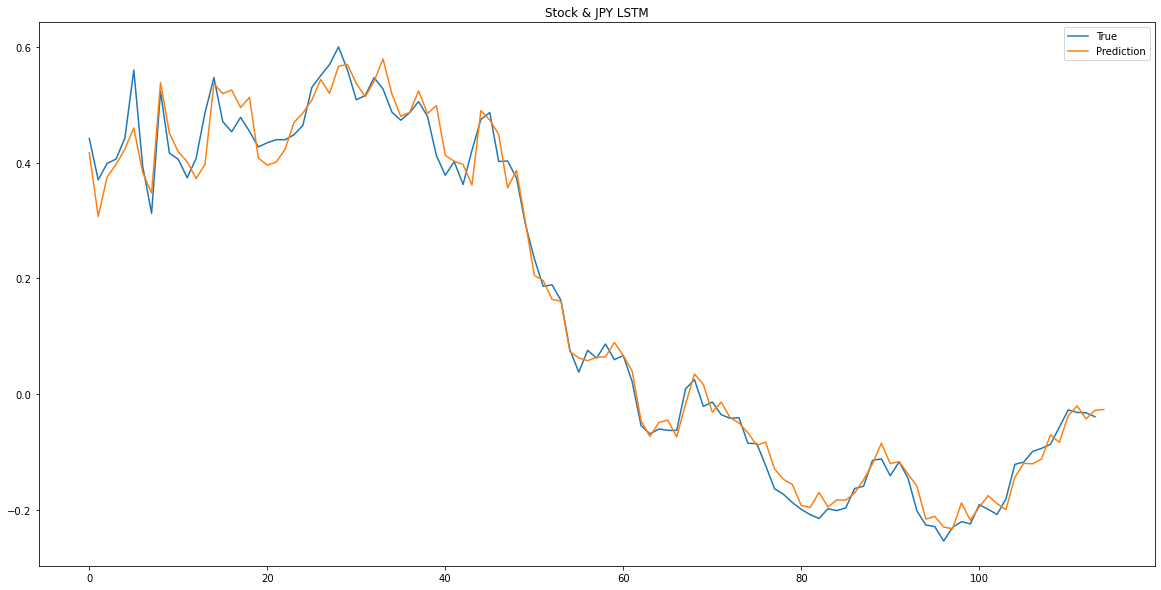

In [17]:
pred = model.predict(x_test)

fig = plt.figure(facecolor='white', figsize=(20, 10))
ax = fig.add_subplot(111)
ax.plot(y_test, label='True')
ax.plot(pred, label='Prediction')
plt.title('Stock & JPY LSTM')
ax.legend()
plt.show()

# 주가 LSTM - EUR

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense, Activation
# from keras.callbacks import TensorBoard, ModelCheckpoint, ReduceLROnPlateau
import datetime

st_data = pd.read_csv('셀트리온_data.csv', index_col=[0])
st_data.drop(['keyword'], axis='columns', inplace=True)
st_data.head()

ex_data = pd.read_csv('exchange_index.csv', index_col=[0])
ex_data.drop(['date', 'usd', 'jpy', 'cny'], axis='columns', inplace=True)
df = pd.concat([st_data, ex_data], axis=1)
# ex_data.head()
# df.head()

high_price = df['high'].values
low_price = df['low'].values
mid_price = (high_price + low_price) /2

# 최근 50일 데이터를 다음을 예측
# 50개를 보고 예측하기 때문에 51개씩 저장
seq_len = 50
sequence_length = seq_len + 1

result = []
for index in range(len(mid_price) - sequence_length):
    result.append(mid_price[index: index + sequence_length])
    
try:
    normalized_data = []
    for window in result:
        normalized_window = [((float(p) / float(window[1])) - 1) for p in window]
        normalized_data.append(normalized_window)
except:
    print('예외 발생!')

result = np.array(normalized_data)

# split train and test data
row = int(round(result.shape[0] * 0.9))
train = result[:row, :]
np.random.shuffle(train)

x_train = train[:, :-1]
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = train[:, -1]

x_test = result[row:, :-1]
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
y_test = result[row:, -1]

x_train.shape, x_test.shape

((1064, 50, 1), (118, 50, 1))

In [19]:
model = Sequential()

model.add(LSTM(50, return_sequences=True, input_shape=(50, 1)))

model.add(LSTM(64, return_sequences=False))

model.add(Dense(1, activation='linear'))

model.compile(loss='mse', optimizer='rmsprop')
# model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 50, 50)            10400     
_________________________________________________________________
lstm_5 (LSTM)                (None, 64)                29440     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 39,905
Trainable params: 39,905
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=10, epochs=100)
# print('정확도 : %.4f' % (model.evaluate(x_train, y_train)[1]))

Epoch 1/100
107/107 [==============================] - 3s 26ms/step - loss: 0.0095 - val_loss: nan
Epoch 2/100
107/107 [==============================] - 2s 16ms/step - loss: 0.0046 - val_loss: nan
Epoch 3/100
107/107 [==============================] - 2s 16ms/step - loss: 0.0031 - val_loss: nan
Epoch 4/100
107/107 [==============================] - 2s 16ms/step - loss: 0.0023 - val_loss: nan
Epoch 5/100
107/107 [==============================] - 2s 17ms/step - loss: 0.0018 - val_loss: nan
Epoch 6/100
107/107 [==============================] - 2s 17ms/step - loss: 0.0016 - val_loss: nan
Epoch 7/100
107/107 [==============================] - 2s 17ms/step - loss: 0.0014 - val_loss: nan
Epoch 8/100
107/107 [==============================] - 2s 17ms/step - loss: 0.0013 - val_loss: nan
Epoch 9/100
107/107 [==============================] - 2s 17ms/step - loss: 0.0013 - val_loss: nans - loss: 0.00
Epoch 10/100
107/107 [==============================] - 2s 17ms/step - loss: 0.0012 - val_loss:

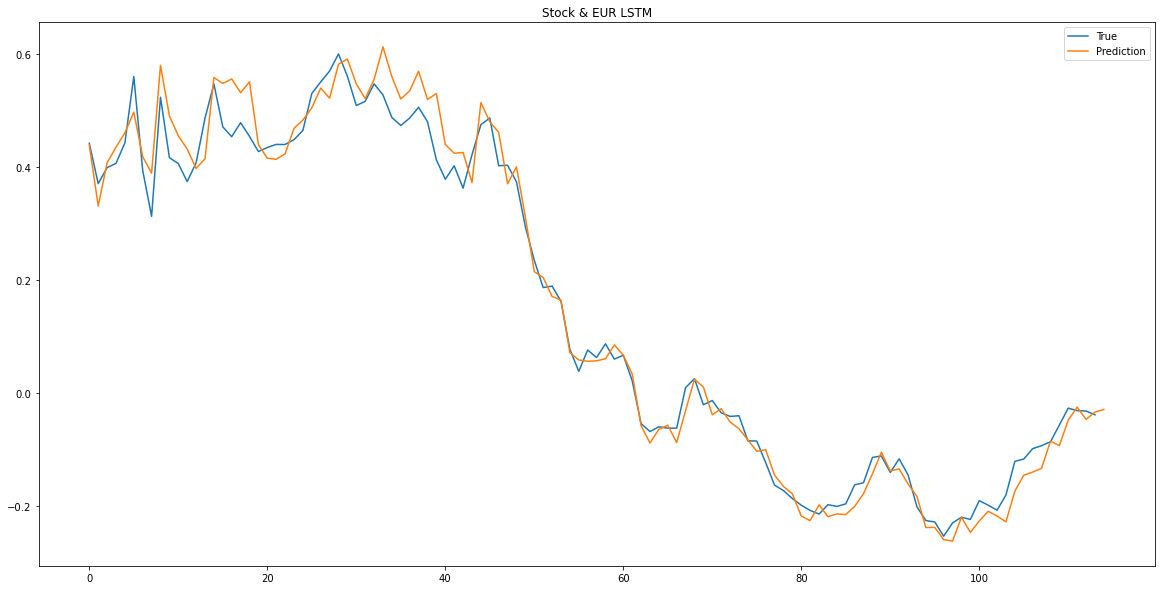

In [21]:
pred = model.predict(x_test)

fig = plt.figure(facecolor='white', figsize=(20, 10))
ax = fig.add_subplot(111)
ax.plot(y_test, label='True')
ax.plot(pred, label='Prediction')
plt.title('Stock & EUR LSTM')
ax.legend()
plt.show()

# 주가 LSTM - CNY

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense, Activation
# from keras.callbacks import TensorBoard, ModelCheckpoint, ReduceLROnPlateau
import datetime

st_data = pd.read_csv('셀트리온_data.csv', index_col=[0])
st_data.drop(['keyword'], axis='columns', inplace=True)
st_data.head()

ex_data = pd.read_csv('exchange_index.csv', index_col=[0])
ex_data.drop(['date', 'usd', 'jpy', 'eur'], axis='columns', inplace=True)
df = pd.concat([st_data, ex_data], axis=1)
# ex_data.head()
# df.head()

high_price = df['high'].values
low_price = df['low'].values
mid_price = (high_price + low_price) /2

# 최근 50일 데이터를 다음을 예측
# 50개를 보고 예측하기 때문에 51개씩 저장
seq_len = 50
sequence_length = seq_len + 1

result = []
for index in range(len(mid_price) - sequence_length):
    result.append(mid_price[index: index + sequence_length])
    
try:
    normalized_data = []
    for window in result:
        normalized_window = [((float(p) / float(window[1])) - 1) for p in window]
        normalized_data.append(normalized_window)
except:
    print('예외 발생!')

result = np.array(normalized_data)

# split train and test data
row = int(round(result.shape[0] * 0.9))
train = result[:row, :]
np.random.shuffle(train)

x_train = train[:, :-1]
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = train[:, -1]

x_test = result[row:, :-1]
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
y_test = result[row:, -1]

x_train.shape, x_test.shape

((1064, 50, 1), (118, 50, 1))

In [23]:
model = Sequential()

model.add(LSTM(50, return_sequences=True, input_shape=(50, 1)))

model.add(LSTM(64, return_sequences=False))

model.add(Dense(1, activation='linear'))

model.compile(loss='mse', optimizer='rmsprop')
# model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 50, 50)            10400     
_________________________________________________________________
lstm_7 (LSTM)                (None, 64)                29440     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 39,905
Trainable params: 39,905
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=10, epochs=100)
# print('정확도 : %.4f' % (model.evaluate(x_train, y_train)[1]))

Epoch 1/100
107/107 [==============================] - 2s 22ms/step - loss: 0.0078 - val_loss: nan
Epoch 2/100
107/107 [==============================] - 2s 17ms/step - loss: 0.0040 - val_loss: nan
Epoch 3/100
107/107 [==============================] - 2s 16ms/step - loss: 0.0028 - val_loss: nan
Epoch 4/100
107/107 [==============================] - 2s 16ms/step - loss: 0.0022 - val_loss: nan
Epoch 5/100
107/107 [==============================] - 2s 16ms/step - loss: 0.0017 - val_loss: nan
Epoch 6/100
107/107 [==============================] - 2s 16ms/step - loss: 0.0015 - val_loss: nan
Epoch 7/100
107/107 [==============================] - 2s 16ms/step - loss: 0.0013 - val_loss: nan
Epoch 8/100
107/107 [==============================] - 2s 16ms/step - loss: 0.0012 - val_loss: nan
Epoch 9/100
107/107 [==============================] - 2s 17ms/step - loss: 0.0012 - val_loss: nan
Epoch 10/100
107/107 [==============================] - 2s 17ms/step - loss: 0.0011 - val_loss: nan
Epoch 11/

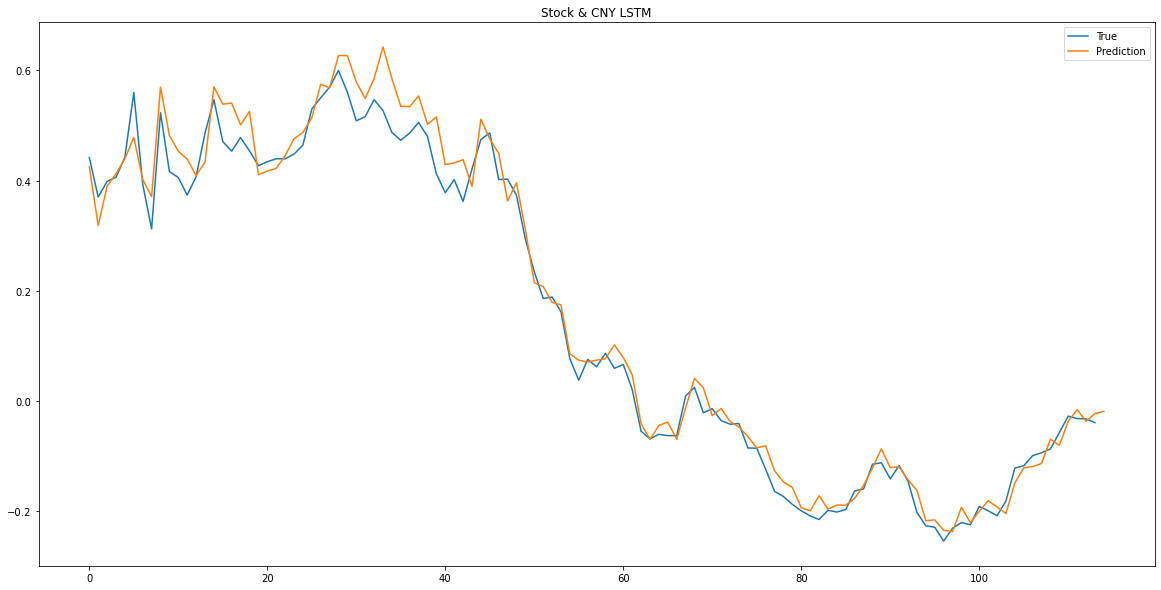

In [25]:
pred = model.predict(x_test)

fig = plt.figure(facecolor='white', figsize=(20, 10))
ax = fig.add_subplot(111)
ax.plot(y_test, label='True')
ax.plot(pred, label='Prediction')
plt.title('Stock & CNY LSTM')
ax.legend()
plt.show()

# 주가 LSTM - 전체 환율

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense, Activation
# from keras.callbacks import TensorBoard, ModelCheckpoint, ReduceLROnPlateau
import datetime

st_data = pd.read_csv('셀트리온_data.csv', index_col=[0])
st_data.drop(['keyword'], axis='columns', inplace=True)
st_data.head()

ex_data = pd.read_csv('exchange_index.csv', index_col=[0])
ex_data.drop(['date'], axis='columns', inplace=True)
df = pd.concat([st_data, ex_data], axis=1)
# ex_data.head()
# df.head()

high_price = df['high'].values
low_price = df['low'].values
mid_price = (high_price + low_price) /2

# 최근 50일 데이터를 다음을 예측
# 50개를 보고 예측하기 때문에 51개씩 저장
seq_len = 50
sequence_length = seq_len + 1

result = []
for index in range(len(mid_price) - sequence_length):
    result.append(mid_price[index: index + sequence_length])
    
try:
    normalized_data = []
    for window in result:
        normalized_window = [((float(p) / float(window[1])) - 1) for p in window]
        normalized_data.append(normalized_window)
except:
    print('예외 발생!')

result = np.array(normalized_data)

# split train and test data
row = int(round(result.shape[0] * 0.9))
train = result[:row, :]
np.random.shuffle(train)

x_train = train[:, :-1]
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = train[:, -1]

x_test = result[row:, :-1]
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
y_test = result[row:, -1]

x_train.shape, x_test.shape

((1064, 50, 1), (118, 50, 1))

In [27]:
model = Sequential()

model.add(LSTM(50, return_sequences=True, input_shape=(50, 1)))

model.add(LSTM(64, return_sequences=False))

model.add(Dense(1, activation='linear'))

model.compile(loss='mse', optimizer='rmsprop')
# model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_8 (LSTM)                (None, 50, 50)            10400     
_________________________________________________________________
lstm_9 (LSTM)                (None, 64)                29440     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 65        
Total params: 39,905
Trainable params: 39,905
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=10, epochs=100)
# print('정확도 : %.4f' % (model.evaluate(x_train, y_train)[1]))

Epoch 1/100
107/107 [==============================] - 3s 26ms/step - loss: 0.0066 - val_loss: nan
Epoch 2/100
107/107 [==============================] - 2s 16ms/step - loss: 0.0038 - val_loss: nan
Epoch 3/100
107/107 [==============================] - 2s 16ms/step - loss: 0.0027 - val_loss: nan
Epoch 4/100
107/107 [==============================] - 2s 16ms/step - loss: 0.0021 - val_loss: nan
Epoch 5/100
107/107 [==============================] - 2s 15ms/step - loss: 0.0018 - val_loss: nan
Epoch 6/100
107/107 [==============================] - 2s 16ms/step - loss: 0.0016 - val_loss: nan
Epoch 7/100
107/107 [==============================] - 2s 15ms/step - loss: 0.0014 - val_loss: nan
Epoch 8/100
107/107 [==============================] - 2s 15ms/step - loss: 0.0013 - val_loss: nan
Epoch 9/100
107/107 [==============================] - 2s 17ms/step - loss: 0.0012 - val_loss: nan
Epoch 10/100
107/107 [==============================] - 2s 16ms/step - loss: 0.0012 - val_loss: nan
Epoch 11/

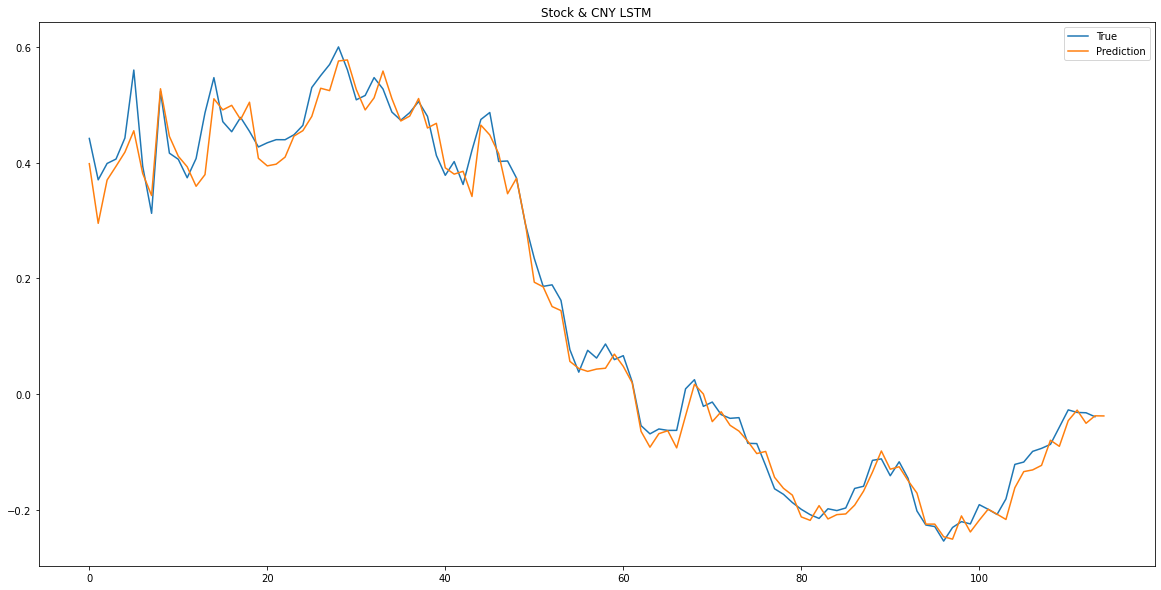

In [29]:
pred = model.predict(x_test)

fig = plt.figure(facecolor='white', figsize=(20, 10))
ax = fig.add_subplot(111)
ax.plot(y_test, label='True')
ax.plot(pred, label='Prediction')
plt.title('Stock & All Exchange LSTM')
ax.legend()
plt.show()

# 주가 LSTM - 전체 환율(epoch=500)

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense, Activation
# from keras.callbacks import TensorBoard, ModelCheckpoint, ReduceLROnPlateau
import datetime

st_data = pd.read_csv('셀트리온_data.csv', index_col=[0])
st_data.drop(['keyword'], axis='columns', inplace=True)
st_data.head()

ex_data = pd.read_csv('exchange_index.csv', index_col=[0])
ex_data.drop(['date'], axis='columns', inplace=True)
df = pd.concat([st_data, ex_data], axis=1)
# ex_data.head()
# df.head()

high_price = df['high'].values
low_price = df['low'].values
mid_price = (high_price + low_price) /2

# 최근 50일 데이터를 다음을 예측
# 50개를 보고 예측하기 때문에 51개씩 저장
seq_len = 50
sequence_length = seq_len + 1

result = []
for index in range(len(mid_price) - sequence_length):
    result.append(mid_price[index: index + sequence_length])
    
try:
    normalized_data = []
    for window in result:
        normalized_window = [((float(p) / float(window[1])) - 1) for p in window]
        normalized_data.append(normalized_window)
except:
    print('예외 발생!')

result = np.array(normalized_data)

# split train and test data
row = int(round(result.shape[0] * 0.9))
train = result[:row, :]
np.random.shuffle(train)

x_train = train[:, :-1]
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = train[:, -1]

x_test = result[row:, :-1]
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
y_test = result[row:, -1]

x_train.shape, x_test.shape

((1064, 50, 1), (118, 50, 1))

In [38]:
model = Sequential()

model.add(LSTM(50, return_sequences=True, input_shape=(50, 1)))

model.add(LSTM(64, return_sequences=False))

model.add(Dense(1, activation='linear'))

model.compile(loss='mse', optimizer='rmsprop')
# model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_18 (LSTM)               (None, 50, 50)            10400     
_________________________________________________________________
lstm_19 (LSTM)               (None, 64)                29440     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 65        
Total params: 39,905
Trainable params: 39,905
Non-trainable params: 0
_________________________________________________________________


In [39]:
model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=10, epochs=500)
# print('정확도 : %.4f' % (model.evaluate(x_train, y_train)[1]))

Epoch 1/500
107/107 [==============================] - 2s 21ms/step - loss: 0.0057 - val_loss: nan
Epoch 2/500
107/107 [==============================] - 2s 16ms/step - loss: 0.0034 - val_loss: nan
Epoch 3/500
107/107 [==============================] - 2s 16ms/step - loss: 0.0026 - val_loss: nan
Epoch 4/500
107/107 [==============================] - 2s 16ms/step - loss: 0.0020 - val_loss: nan
Epoch 5/500
107/107 [==============================] - 2s 16ms/step - loss: 0.0016 - val_loss: nan
Epoch 6/500
107/107 [==============================] - 2s 16ms/step - loss: 0.0015 - val_loss: nan
Epoch 7/500
107/107 [==============================] - 2s 17ms/step - loss: 0.0013 - val_loss: nan
Epoch 8/500
107/107 [==============================] - 2s 16ms/step - loss: 0.0014 - val_loss: nan
Epoch 9/500
107/107 [==============================] - 2s 17ms/step - loss: 0.0012 - val_loss: nan
Epoch 10/500
107/107 [==============================] - 2s 16ms/step - loss: 0.0011 - val_loss: nan
Epoch 11/

107/107 [==============================] - 2s 17ms/step - loss: 5.9914e-04 - val_loss: nan
Epoch 159/500
107/107 [==============================] - 2s 17ms/step - loss: 5.8579e-04 - val_loss: nan
Epoch 160/500
107/107 [==============================] - 2s 17ms/step - loss: 6.0798e-04 - val_loss: nan
Epoch 161/500
107/107 [==============================] - 2s 17ms/step - loss: 5.9679e-04 - val_loss: nan
Epoch 162/500
107/107 [==============================] - 2s 17ms/step - loss: 6.1240e-04 - val_loss: nan
Epoch 163/500
107/107 [==============================] - 2s 17ms/step - loss: 5.8771e-04 - val_loss: nan
Epoch 164/500
107/107 [==============================] - 2s 17ms/step - loss: 5.8781e-04 - val_loss: nan
Epoch 165/500
107/107 [==============================] - 2s 17ms/step - loss: 5.9192e-04 - val_loss: nan
Epoch 166/500
107/107 [==============================] - 2s 17ms/step - loss: 5.9657e-04 - val_loss: nan
Epoch 167/500
107/107 [==============================] - 2s 17ms/step

107/107 [==============================] - 2s 17ms/step - loss: 2.9380e-04 - val_loss: nan
Epoch 315/500
107/107 [==============================] - 2s 17ms/step - loss: 2.8047e-04 - val_loss: nan
Epoch 316/500
107/107 [==============================] - 2s 17ms/step - loss: 2.7979e-04 - val_loss: nan
Epoch 317/500
107/107 [==============================] - 2s 17ms/step - loss: 3.0915e-04 - val_loss: nan
Epoch 318/500
107/107 [==============================] - 2s 16ms/step - loss: 2.9450e-04 - val_loss: nan
Epoch 319/500
107/107 [==============================] - 2s 17ms/step - loss: 2.7037e-04 - val_loss: nan
Epoch 320/500
107/107 [==============================] - 2s 17ms/step - loss: 2.7584e-04 - val_loss: nan
Epoch 321/500
107/107 [==============================] - 2s 17ms/step - loss: 2.6946e-04 - val_loss: nan
Epoch 322/500
107/107 [==============================] - 2s 17ms/step - loss: 2.6244e-04 - val_loss: nan
Epoch 323/500
107/107 [==============================] - 2s 17ms/step

107/107 [==============================] - 2s 17ms/step - loss: 9.5965e-05 - val_loss: nan
Epoch 471/500
107/107 [==============================] - 2s 16ms/step - loss: 1.0273e-04 - val_loss: nan
Epoch 472/500
107/107 [==============================] - 2s 17ms/step - loss: 8.9355e-05 - val_loss: nan
Epoch 473/500
107/107 [==============================] - 2s 16ms/step - loss: 9.0353e-05 - val_loss: nan
Epoch 474/500
107/107 [==============================] - 2s 16ms/step - loss: 9.3029e-05 - val_loss: nan
Epoch 475/500
107/107 [==============================] - 2s 16ms/step - loss: 8.9024e-05 - val_loss: nan
Epoch 476/500
107/107 [==============================] - 2s 17ms/step - loss: 9.9048e-05 - val_loss: nan
Epoch 477/500
107/107 [==============================] - 2s 17ms/step - loss: 8.9402e-05 - val_loss: nan
Epoch 478/500
107/107 [==============================] - 2s 17ms/step - loss: 8.7281e-05 - val_loss: nan
Epoch 479/500
107/107 [==============================] - 2s 17ms/step

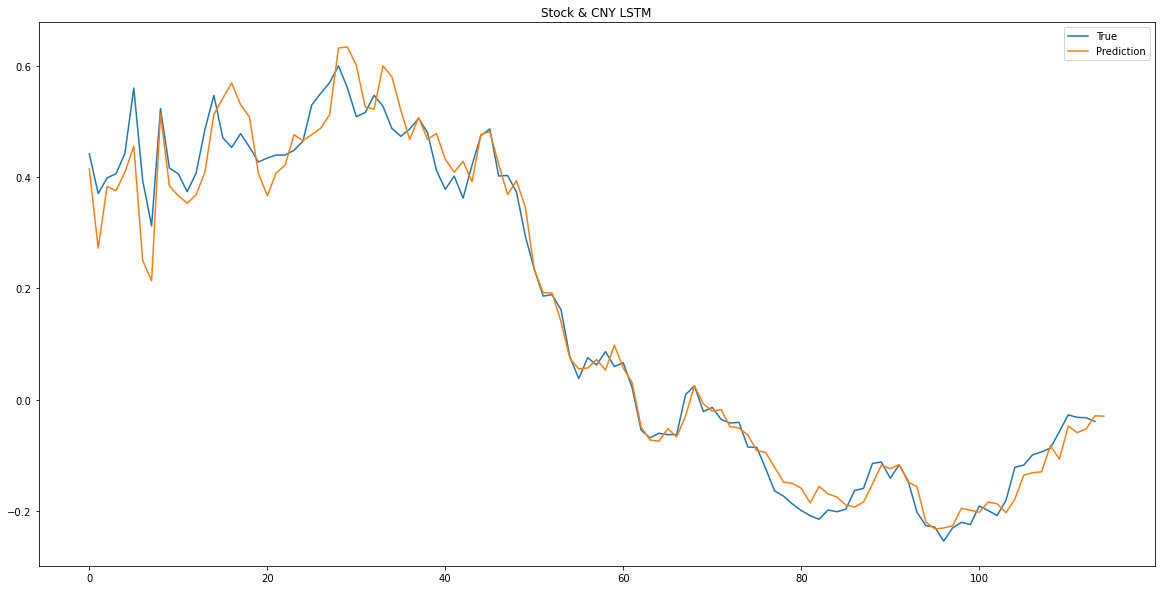

In [35]:
pred = model.predict(x_test)

fig = plt.figure(facecolor='white', figsize=(20, 10))
ax = fig.add_subplot(111)
ax.plot(y_test, label='True')
ax.plot(pred, label='Prediction')
plt.title('Stock & All Exchange LSTM')
ax.legend()
plt.show()

# 주가 LSTM - JPY 제외

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense, Activation
# from keras.callbacks import TensorBoard, ModelCheckpoint, ReduceLROnPlateau
import datetime

st_data = pd.read_csv('셀트리온_data.csv', index_col=[0])
st_data.drop(['keyword'], axis='columns', inplace=True)
st_data.head()

ex_data = pd.read_csv('exchange_index.csv', index_col=[0])
ex_data.drop(['date', 'jpy' ], axis='columns', inplace=True)
df = pd.concat([st_data, ex_data], axis=1)
# ex_data.head()
# df.head()

high_price = df['high'].values
low_price = df['low'].values
mid_price = (high_price + low_price) /2

# 최근 50일 데이터를 다음을 예측
# 50개를 보고 예측하기 때문에 51개씩 저장
seq_len = 50
sequence_length = seq_len + 1

result = []
for index in range(len(mid_price) - sequence_length):
    result.append(mid_price[index: index + sequence_length])
    
try:
    normalized_data = []
    for window in result:
        normalized_window = [((float(p) / float(window[1])) - 1) for p in window]
        normalized_data.append(normalized_window)
except:
    print('예외 발생!')

result = np.array(normalized_data)

# split train and test data
row = int(round(result.shape[0] * 0.9))
train = result[:row, :]
np.random.shuffle(train)

x_train = train[:, :-1]
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = train[:, -1]

x_test = result[row:, :-1]
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
y_test = result[row:, -1]

x_train.shape, x_test.shape

((1064, 50, 1), (118, 50, 1))

In [41]:
model = Sequential()

model.add(LSTM(50, return_sequences=True, input_shape=(50, 1)))

model.add(LSTM(64, return_sequences=False))

model.add(Dense(1, activation='linear'))

model.compile(loss='mse', optimizer='rmsprop')
# model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_20 (LSTM)               (None, 50, 50)            10400     
_________________________________________________________________
lstm_21 (LSTM)               (None, 64)                29440     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 65        
Total params: 39,905
Trainable params: 39,905
Non-trainable params: 0
_________________________________________________________________


In [45]:
model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=10, epochs=500)
# print('정확도 : %.4f' % (model.evaluate(x_train, y_train)[1]))

Epoch 1/500
107/107 [==============================] - 2s 16ms/step - loss: 7.7288e-04 - val_loss: nan
Epoch 2/500
107/107 [==============================] - 2s 16ms/step - loss: 7.8718e-04 - val_loss: nan
Epoch 3/500
107/107 [==============================] - 2s 16ms/step - loss: 7.8768e-04 - val_loss: nan
Epoch 4/500
107/107 [==============================] - 2s 16ms/step - loss: 7.5248e-04 - val_loss: nan
Epoch 5/500
107/107 [==============================] - 2s 16ms/step - loss: 7.3461e-04 - val_loss: nan
Epoch 6/500
107/107 [==============================] - 2s 17ms/step - loss: 7.5262e-04 - val_loss: nan
Epoch 7/500
107/107 [==============================] - 2s 16ms/step - loss: 7.5090e-04 - val_loss: nan
Epoch 8/500
107/107 [==============================] - 2s 16ms/step - loss: 7.1067e-04 - val_loss: nan
Epoch 9/500
107/107 [==============================] - 2s 16ms/step - loss: 7.1887e-04 - val_loss: nan
Epoch 10/500
107/107 [==============================] - 2s 17ms/step - lo

Epoch 80/500
107/107 [==============================] - 2s 16ms/step - loss: 5.9955e-04 - val_loss: nan
Epoch 81/500
107/107 [==============================] - 2s 16ms/step - loss: 5.8756e-04 - val_loss: nan
Epoch 82/500
107/107 [==============================] - 2s 17ms/step - loss: 5.8024e-04 - val_loss: nan
Epoch 83/500
107/107 [==============================] - 2s 16ms/step - loss: 5.9381e-04 - val_loss: nan
Epoch 84/500
107/107 [==============================] - 2s 16ms/step - loss: 5.9362e-04 - val_loss: nan
Epoch 85/500
107/107 [==============================] - 2s 16ms/step - loss: 5.6098e-04 - val_loss: nan
Epoch 86/500
107/107 [==============================] - 2s 16ms/step - loss: 5.7608e-04 - val_loss: nan
Epoch 87/500
107/107 [==============================] - 2s 16ms/step - loss: 5.6881e-04 - val_loss: nan
Epoch 88/500
107/107 [==============================] - 2s 17ms/step - loss: 5.5424e-04 - val_loss: nan
Epoch 89/500
107/107 [==============================] - 2s 16ms/

107/107 [==============================] - 2s 17ms/step - loss: 2.9683e-04 - val_loss: nan
Epoch 237/500
107/107 [==============================] - 2s 16ms/step - loss: 3.1574e-04 - val_loss: nan
Epoch 238/500
107/107 [==============================] - 2s 16ms/step - loss: 2.9795e-04 - val_loss: nan
Epoch 239/500
107/107 [==============================] - 2s 16ms/step - loss: 3.1458e-04 - val_loss: nan
Epoch 240/500
107/107 [==============================] - 2s 16ms/step - loss: 2.9642e-04 - val_loss: nan
Epoch 241/500
107/107 [==============================] - 2s 16ms/step - loss: 2.9668e-04 - val_loss: nan
Epoch 242/500
107/107 [==============================] - 2s 16ms/step - loss: 2.8550e-04 - val_loss: nan
Epoch 243/500
107/107 [==============================] - 2s 16ms/step - loss: 2.9209e-04 - val_loss: nan
Epoch 244/500
107/107 [==============================] - 2s 16ms/step - loss: 2.9802e-04 - val_loss: nan
Epoch 245/500
107/107 [==============================] - 2s 17ms/step

107/107 [==============================] - 2s 16ms/step - loss: 1.0453e-04 - val_loss: nan
Epoch 393/500
107/107 [==============================] - 2s 16ms/step - loss: 1.0696e-04 - val_loss: nan
Epoch 394/500
107/107 [==============================] - 2s 16ms/step - loss: 1.0843e-04 - val_loss: nan
Epoch 395/500
107/107 [==============================] - 2s 16ms/step - loss: 1.0951e-04 - val_loss: nan
Epoch 396/500
107/107 [==============================] - 2s 16ms/step - loss: 1.0892e-04 - val_loss: nan
Epoch 397/500
107/107 [==============================] - 2s 16ms/step - loss: 1.0371e-04 - val_loss: nan
Epoch 398/500
107/107 [==============================] - 2s 16ms/step - loss: 1.0459e-04 - val_loss: nan
Epoch 399/500
107/107 [==============================] - 2s 16ms/step - loss: 1.0594e-04 - val_loss: nan
Epoch 400/500
107/107 [==============================] - 2s 16ms/step - loss: 1.0876e-04 - val_loss: nan
Epoch 401/500
107/107 [==============================] - 2s 16ms/step

107/107 [==============================] - 2s 16ms/step - loss: 7.5707e-05 - val_loss: nan
Epoch 471/500
107/107 [==============================] - 2s 16ms/step - loss: 7.3051e-05 - val_loss: nan
Epoch 472/500
107/107 [==============================] - 2s 16ms/step - loss: 8.0671e-05 - val_loss: nan
Epoch 473/500
107/107 [==============================] - 2s 16ms/step - loss: 7.4569e-05 - val_loss: nan
Epoch 474/500
107/107 [==============================] - 2s 16ms/step - loss: 7.6956e-05 - val_loss: nan
Epoch 475/500
107/107 [==============================] - 2s 16ms/step - loss: 7.1706e-05 - val_loss: nan
Epoch 476/500
107/107 [==============================] - 2s 16ms/step - loss: 7.3798e-05 - val_loss: nan
Epoch 477/500
107/107 [==============================] - 2s 16ms/step - loss: 7.2469e-05 - val_loss: nan
Epoch 478/500
107/107 [==============================] - 2s 16ms/step - loss: 7.5325e-05 - val_loss: nan
Epoch 479/500
107/107 [==============================] - 2s 16ms/step

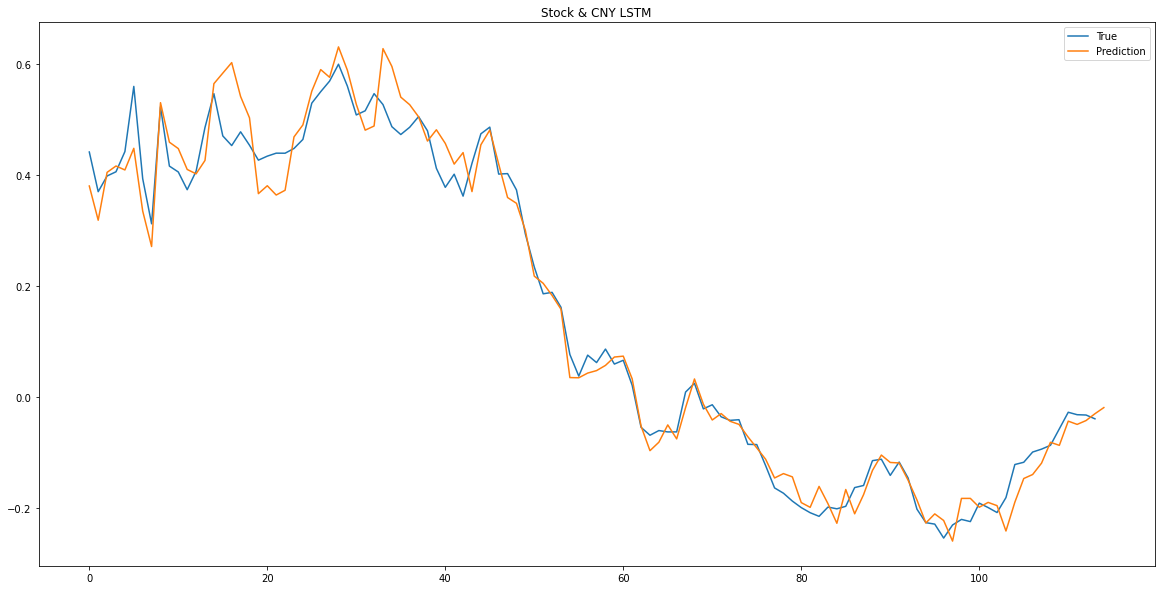

In [46]:
pred = model.predict(x_test)

fig = plt.figure(facecolor='white', figsize=(20, 10))
ax = fig.add_subplot(111)
ax.plot(y_test, label='True')
ax.plot(pred, label='Prediction')
plt.title('Stock & USD, EUR, CNY LSTM')
ax.legend()
plt.show()

# 주가 LSTM - JPY, EUR 제외 -  하나투어

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense, Activation
# from keras.callbacks import TensorBoard, ModelCheckpoint, ReduceLROnPlateau
import datetime

st_data = pd.read_csv('하나투어_data.csv', index_col=[0])
st_data.drop(['keyword'], axis='columns', inplace=True)
st_data.head()

ex_data = pd.read_csv('exchange_index.csv', index_col=[0])
ex_data.drop(['date', 'jpy', 'eur' ], axis='columns', inplace=True)
df = pd.concat([st_data, ex_data], axis=1)
# ex_data.head()
# df.head()

high_price = df['high'].values
low_price = df['low'].values
mid_price = (high_price + low_price) /2

# 최근 50일 데이터를 다음을 예측
# 50개를 보고 예측하기 때문에 51개씩 저장
seq_len = 50
sequence_length = seq_len + 1

result = []
for index in range(len(mid_price) - sequence_length):
    result.append(mid_price[index: index + sequence_length])
    
try:
    normalized_data = []
    for window in result:
        normalized_window = [((float(p) / float(window[1])) - 1) for p in window]
        normalized_data.append(normalized_window)
except:
    print('예외 발생!')

result = np.array(normalized_data)

# split train and test data
row = int(round(result.shape[0] * 0.9))
train = result[:row, :]
np.random.shuffle(train)

x_train = train[:, :-1]
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = train[:, -1]

x_test = result[row:, :-1]
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
y_test = result[row:, -1]

x_train.shape, x_test.shape

((1064, 50, 1), (118, 50, 1))

In [70]:
model = Sequential()

model.add(LSTM(50, return_sequences=True, input_shape=(50, 1)))

model.add(LSTM(64, return_sequences=False))

model.add(Dense(1, activation='linear'))

model.compile(loss='mse', optimizer='rmsprop')
# model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_30 (LSTM)               (None, 50, 50)            10400     
_________________________________________________________________
lstm_31 (LSTM)               (None, 64)                29440     
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 65        
Total params: 39,905
Trainable params: 39,905
Non-trainable params: 0
_________________________________________________________________


In [71]:
model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=10, epochs=500)
# print('정확도 : %.4f' % (model.evaluate(x_train, y_train)[1]))

Epoch 1/500
107/107 [==============================] - 2s 22ms/step - loss: 0.0030 - val_loss: nan
Epoch 2/500
107/107 [==============================] - 2s 16ms/step - loss: 0.0015 - val_loss: nan
Epoch 3/500
107/107 [==============================] - 2s 17ms/step - loss: 0.0011 - val_loss: nan
Epoch 4/500
107/107 [==============================] - 2s 17ms/step - loss: 8.0985e-04 - val_loss: nan
Epoch 5/500
107/107 [==============================] - 2s 17ms/step - loss: 6.5157e-04 - val_loss: nan
Epoch 6/500
107/107 [==============================] - 2s 16ms/step - loss: 5.6134e-04 - val_loss: nan
Epoch 7/500
107/107 [==============================] - 2s 17ms/step - loss: 4.9876e-04 - val_loss: nan
Epoch 8/500
107/107 [==============================] - 2s 17ms/step - loss: 5.0579e-04 - val_loss: nan
Epoch 9/500
107/107 [==============================] - 2s 17ms/step - loss: 4.7525e-04 - val_loss: nan
Epoch 10/500
107/107 [==============================] - 2s 17ms/step - loss: 4.5887e-

Epoch 80/500
107/107 [==============================] - 2s 17ms/step - loss: 4.1955e-04 - val_loss: nan
Epoch 81/500
107/107 [==============================] - 2s 17ms/step - loss: 4.2453e-04 - val_loss: nan
Epoch 82/500
107/107 [==============================] - 2s 17ms/step - loss: 4.2947e-04 - val_loss: nan
Epoch 83/500
107/107 [==============================] - 2s 17ms/step - loss: 4.1701e-04 - val_loss: nan
Epoch 84/500
107/107 [==============================] - 2s 17ms/step - loss: 4.2077e-04 - val_loss: nan
Epoch 85/500
107/107 [==============================] - 2s 16ms/step - loss: 4.2193e-04 - val_loss: nan
Epoch 86/500
107/107 [==============================] - 2s 17ms/step - loss: 4.2299e-04 - val_loss: nan
Epoch 87/500
107/107 [==============================] - 2s 17ms/step - loss: 4.2793e-04 - val_loss: nan
Epoch 88/500
107/107 [==============================] - 2s 17ms/step - loss: 4.2489e-04 - val_loss: nan
Epoch 89/500
107/107 [==============================] - 2s 17ms/

107/107 [==============================] - 2s 17ms/step - loss: 4.1427e-04 - val_loss: nan
Epoch 159/500
107/107 [==============================] - 2s 17ms/step - loss: 4.0703e-04 - val_loss: nan
Epoch 160/500
107/107 [==============================] - 2s 17ms/step - loss: 4.1372e-04 - val_loss: nan
Epoch 161/500
107/107 [==============================] - 2s 17ms/step - loss: 4.1548e-04 - val_loss: nan
Epoch 162/500
107/107 [==============================] - 2s 17ms/step - loss: 4.0056e-04 - val_loss: nan
Epoch 163/500
107/107 [==============================] - 2s 17ms/step - loss: 4.0499e-04 - val_loss: nan
Epoch 164/500
107/107 [==============================] - 2s 17ms/step - loss: 4.0839e-04 - val_loss: nan
Epoch 165/500
107/107 [==============================] - 2s 17ms/step - loss: 4.1187e-04 - val_loss: nan
Epoch 166/500
107/107 [==============================] - 2s 17ms/step - loss: 4.0743e-04 - val_loss: nan
Epoch 167/500
107/107 [==============================] - 2s 17ms/step

107/107 [==============================] - 2s 16ms/step - loss: 3.0339e-04 - val_loss: nan
Epoch 315/500
107/107 [==============================] - 2s 16ms/step - loss: 2.9327e-04 - val_loss: nan
Epoch 316/500
107/107 [==============================] - 2s 16ms/step - loss: 2.9201e-04 - val_loss: nan
Epoch 317/500
107/107 [==============================] - 2s 16ms/step - loss: 2.9940e-04 - val_loss: nan
Epoch 318/500
107/107 [==============================] - 2s 16ms/step - loss: 2.9029e-04 - val_loss: nan
Epoch 319/500
107/107 [==============================] - 2s 16ms/step - loss: 2.9064e-04 - val_loss: nan
Epoch 320/500
107/107 [==============================] - 2s 16ms/step - loss: 2.9207e-04 - val_loss: nan
Epoch 321/500
107/107 [==============================] - 2s 16ms/step - loss: 2.9817e-04 - val_loss: nan
Epoch 322/500
107/107 [==============================] - 2s 16ms/step - loss: 2.8681e-04 - val_loss: nan
Epoch 323/500
107/107 [==============================] - 2s 16ms/step

107/107 [==============================] - 2s 16ms/step - loss: 1.0684e-04 - val_loss: nan
Epoch 471/500
107/107 [==============================] - 2s 16ms/step - loss: 1.0243e-04 - val_loss: nan
Epoch 472/500
107/107 [==============================] - 2s 16ms/step - loss: 1.0384e-04 - val_loss: nan
Epoch 473/500
107/107 [==============================] - 2s 15ms/step - loss: 1.0134e-04 - val_loss: nan
Epoch 474/500
107/107 [==============================] - 2s 15ms/step - loss: 9.7959e-05 - val_loss: nan
Epoch 475/500
107/107 [==============================] - 2s 16ms/step - loss: 1.0108e-04 - val_loss: nan
Epoch 476/500
107/107 [==============================] - 2s 16ms/step - loss: 9.6257e-05 - val_loss: nan
Epoch 477/500
107/107 [==============================] - 2s 16ms/step - loss: 9.6714e-05 - val_loss: nan
Epoch 478/500
107/107 [==============================] - 2s 16ms/step - loss: 9.4712e-05 - val_loss: nan
Epoch 479/500
107/107 [==============================] - 2s 16ms/step

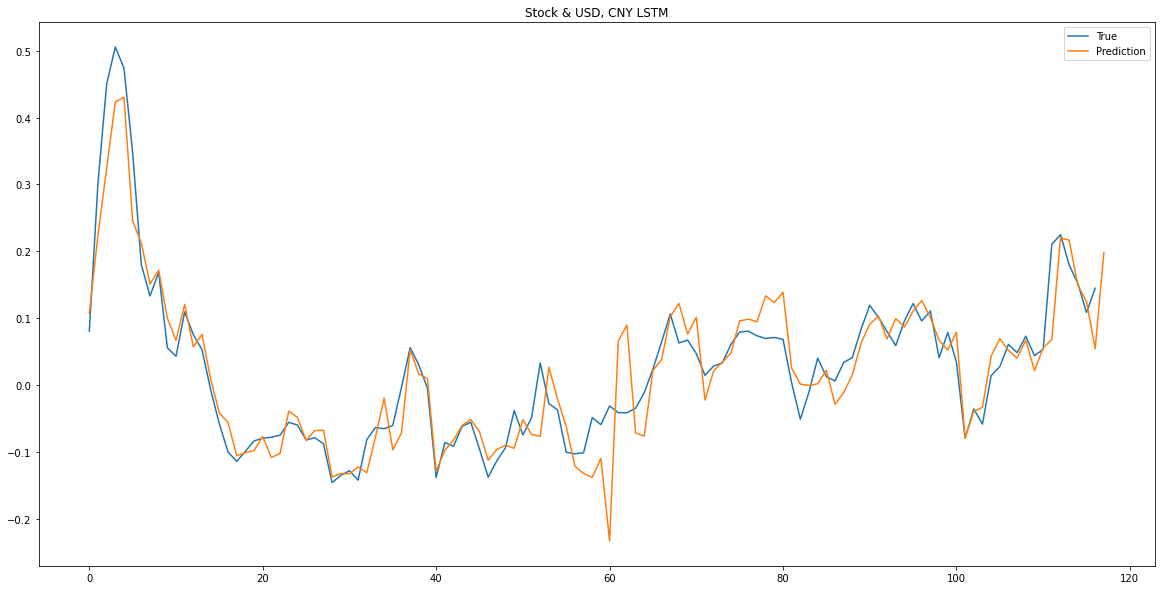

In [72]:
pred = model.predict(x_test)

fig = plt.figure(facecolor='white', figsize=(20, 10))
ax = fig.add_subplot(111)
ax.plot(y_test, label='True')
ax.plot(pred, label='Prediction')
plt.title('Stock & USD, CNY LSTM')
ax.legend()
plt.show()

# 주가 LSTM - JPY, EUR 제외

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense, Activation
# from keras.callbacks import TensorBoard, ModelCheckpoint, ReduceLROnPlateau
import datetime

st_data = pd.read_csv('셀트리온_data.csv', index_col=[0])
st_data.drop(['keyword'], axis='columns', inplace=True)
st_data.head()

ex_data = pd.read_csv('exchange_index.csv', index_col=[0])
ex_data.drop(['date', 'jpy', 'eur' ], axis='columns', inplace=True)
df = pd.concat([st_data, ex_data], axis=1)
# ex_data.head()
# df.head()

high_price = df['high'].values
low_price = df['low'].values
mid_price = (high_price + low_price) /2

# 최근 50일 데이터를 다음을 예측
# 50개를 보고 예측하기 때문에 51개씩 저장
seq_len = 50
sequence_length = seq_len + 1

result = []
for index in range(len(mid_price) - sequence_length):
    result.append(mid_price[index: index + sequence_length])
    
try:
    normalized_data = []
    for window in result:
        normalized_window = [((float(p) / float(window[1])) - 1) for p in window]
        normalized_data.append(normalized_window)
except:
    print('예외 발생!')

result = np.array(normalized_data)

# split train and test data
row = int(round(result.shape[0] * 0.9))
train = result[:row, :]
np.random.shuffle(train)

x_train = train[:, :-1]
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = train[:, -1]

x_test = result[row:, :-1]
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
y_test = result[row:, -1]

x_train.shape, x_test.shape

((1064, 50, 1), (118, 50, 1))

In [64]:
model = Sequential()

model.add(LSTM(50, return_sequences=True, input_shape=(50, 1)))

model.add(LSTM(64, return_sequences=False))

model.add(Dense(1, activation='linear'))

model.compile(loss='mse', optimizer='rmsprop')
# model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_28 (LSTM)               (None, 50, 50)            10400     
_________________________________________________________________
lstm_29 (LSTM)               (None, 64)                29440     
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 65        
Total params: 39,905
Trainable params: 39,905
Non-trainable params: 0
_________________________________________________________________


In [65]:
model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=10, epochs=100)
# print('정확도 : %.4f' % (model.evaluate(x_train, y_train)[1]))

Epoch 1/100
107/107 [==============================] - 2s 22ms/step - loss: 0.0061 - val_loss: nan
Epoch 2/100
107/107 [==============================] - 2s 16ms/step - loss: 0.0034 - val_loss: nan
Epoch 3/100
107/107 [==============================] - 2s 16ms/step - loss: 0.0025 - val_loss: nan
Epoch 4/100
107/107 [==============================] - 2s 17ms/step - loss: 0.0020 - val_loss: nan
Epoch 5/100
107/107 [==============================] - 2s 16ms/step - loss: 0.0017 - val_loss: nan
Epoch 6/100
107/107 [==============================] - 2s 16ms/step - loss: 0.0013 - val_loss: nan
Epoch 7/100
107/107 [==============================] - 2s 17ms/step - loss: 0.0013 - val_loss: nan
Epoch 8/100
107/107 [==============================] - 2s 16ms/step - loss: 0.0012 - val_loss: nan
Epoch 9/100
107/107 [==============================] - 2s 16ms/step - loss: 0.0011 - val_loss: nan
Epoch 10/100
107/107 [==============================] - 2s 17ms/step - loss: 0.0011 - val_loss: nan
Epoch 11/

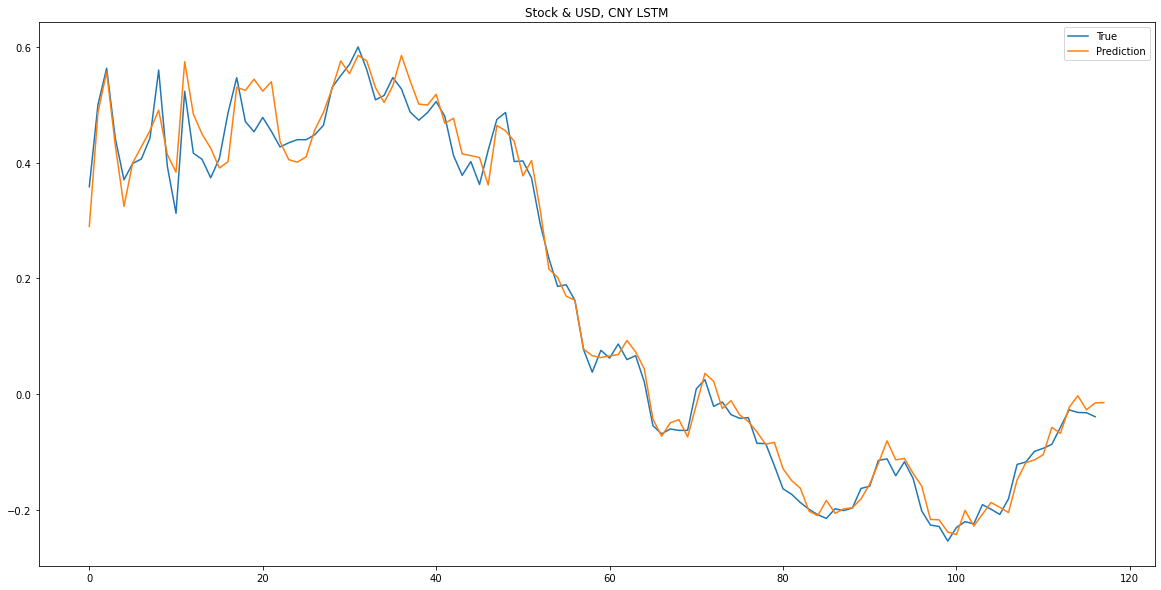

In [67]:
pred = model.predict(x_test)

fig = plt.figure(facecolor='white', figsize=(20, 10))
ax = fig.add_subplot(111)
ax.plot(y_test, label='True')
ax.plot(pred, label='Prediction')
plt.title('Stock & USD, CNY LSTM')
ax.legend()
plt.show()